#**1 Introduction**

Photo-realistic terapixel visualization is computationally costly, and there have been no such visualization of urban digital twins to date, with the few terapixel visualizations that do exist focus on space rather than earth. The objective of the project was to visualize the data collected from the IoT device by urban observatory of the Newcastle. Terapixel images provide an intuitive and open way for stakeholders to present information sets, enabling audiences to interactively search big data across multiple scales. The problem we addressed here is how to offer the resources needed on a supercomputer scale to create a realistic simulation of Newcastle Tyne's city and its environmental data as gathered by the Newcastle urban observatory team. In our project we have used matplotlib and seaborn for data visualization. The platform we used for the project is jupyter (google colab notebook), Pandas and numpy for data cleansing and data exploration. 

#**2 Importing Essential Libraries**

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import files

#**3 Uploading the TeraScope files**

In [ ]:
files.upload()

Saving task-x-y.csv to task-x-y.csv


{'task-x-y.csv': b'taskId,jobId,x,y,level\n"00004e77-304c-4fbd-88a1-1346ef947567","1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705",116,178,12\n"0002afb5-d05e-4da9-bd53-7b6dc19ea6d4","1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705",142,190,12\n"0003c380-4db9-49fb-8e1c-6f8ae466ad85","1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705",142,86,12\n"000993b6-fc88-489d-a4ca-0a44fd800bd3","1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705",235,11,12\n"000b158b-0ba3-4dca-bf5b-1b3bd5c28207","1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705",171,53,12\n"000d1def-1478-40d3-a5e3-4f848daee474","1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705",179,226,12\n"000db9f9-d12d-4889-81cf-325906635535","1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705",255,61,12\n"0010651d-5f82-47ff-885c-1cdbaac2b1eb","1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705",218,250,12\n"00107991-1ad1-42c8-80b7-1c2dea75a1d5","1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705",241,166,12\n"0010aed5-8d4a-4298-9ff9-9a248f0db508","1024-lvl12-7

**2.1 Reading all the three file**

In [4]:
gpu=pd.read_csv("gpu.csv")
application_checkpoints=pd.read_csv("application-checkpoints.csv")
task=pd.read_csv("task-x-y.csv")

**2.2 Descriptive stats for all the three files**

In [5]:
application_checkpoints.describe()

timestamp  ...                                taskId
count                     660400  ...                                660400
unique                    363555  ...                                 65793
top     2018-11-08T07:41:31.776Z  ...  92ca629f-980f-4bc6-a705-6fe7ca01c635
freq                          18  ...                                    20

[4 rows x 6 columns]

In [6]:
gpu.describe()

gpuSerial  powerDrawWatt      gpuTempC   gpuUtilPerc  gpuMemUtilPerc
count  1.543681e+06   1.543681e+06  1.543681e+06  1.543681e+06    1.543681e+06
mean   3.239836e+11   8.919838e+01  4.007560e+01  6.305820e+01    3.341359e+01
std    1.228841e+09   3.975742e+01  3.800243e+00  4.144816e+01    2.300107e+01
min    3.201181e+11   2.255000e+01  2.600000e+01  0.000000e+00    0.000000e+00
25%    3.236170e+11   4.499000e+01  3.800000e+01  0.000000e+00    0.000000e+00
50%    3.236170e+11   9.659000e+01  4.000000e+01  8.900000e+01    4.300000e+01
75%    3.250170e+11   1.213400e+02  4.200000e+01  9.200000e+01    5.100000e+01
max    3.252171e+11   1.970100e+02  5.500000e+01  1.000000e+02    8.300000e+01

In [7]:
task.describe()

x             y         level
count  65793.000000  65793.000000  65793.000000
mean     127.031143    127.031143     11.984314
std       74.135963     74.135963      0.250965
min        0.000000      0.000000      4.000000
25%       63.000000     63.000000     12.000000
50%      127.000000    127.000000     12.000000
75%      191.000000    191.000000     12.000000
max      255.000000    255.000000     12.000000

#**4 Data Preprocessing**

Changing the timestamp for application and gpu file

In [8]:
#conveting timestamp into datetimeformat
#application file
application_checkpoints[['timestamp']]=application_checkpoints[['timestamp']].apply(pd.to_datetime,format='%Y-%m-%d %H:%M:%S.%f')

#gpu file 
gpu[['timestamp']]=gpu[['timestamp']].apply(pd.to_datetime,format='%Y-%m-%d %H:%M:%S.%f')


Merging the application and task file besed on jobid and taskId

In [9]:
#merging application and task file based on jobId and taskId
df_app_task_merge=pd.merge(application_checkpoints,task,on=['taskId', 'jobId'], how='left')

In [10]:
df_app_task_merge.head(5)

timestamp  ... level
0 2018-11-08 07:41:55.921000+00:00  ...    12
1 2018-11-08 07:42:29.842000+00:00  ...    12
2 2018-11-08 07:42:29.845000+00:00  ...    12
3 2018-11-08 07:42:29.845000+00:00  ...    12
4 2018-11-08 07:43:13.957000+00:00  ...    12

[5 rows x 9 columns]

In [11]:
pd.options.mode.chained_assignment = None
#recording start and stop time in seperate column
#seperating the start and stop rows form the main dataset
start_df = df_app_task_merge[df_app_task_merge['eventType'] == 'START']
stop_df=df_app_task_merge[df_app_task_merge['eventType']=='STOP']

#Renaming the timestamp of start and stop as start_time and stop_time
start_df.rename(index=str, columns={"timestamp": "start_time"}, inplace = True)
stop_df.rename(index=str, columns={"timestamp": "stop_time"}, inplace = True)

#droping the eventType from both the start, stop dataframe
stop_df.drop('eventType', axis = 1, inplace = True)
start_df.drop('eventType', axis = 1, inplace = True)

#merging the start_df and stop_df 
sorted_df=pd.merge(stop_df,start_df,on=['eventName','jobId','taskId','hostname','x','y','level'])
sorted_df=sorted_df.reindex(columns=['start_time']+sorted_df.columns[:-1].tolist())

In [12]:
sorted_df.head(5)

start_time                        stop_time  ...   y level
0 2018-11-08 07:41:55.200000+00:00 2018-11-08 07:41:55.921000+00:00  ...  10    12
1 2018-11-08 07:42:29.842000+00:00 2018-11-08 07:42:29.845000+00:00  ...   4    12
2 2018-11-08 07:42:29.842000+00:00 2018-11-08 07:43:13.957000+00:00  ...   4    12
3 2018-11-08 07:43:16.506000+00:00 2018-11-08 07:43:56.239000+00:00  ...   5    12
4 2018-11-08 07:43:56.246000+00:00 2018-11-08 07:43:57.223000+00:00  ...   5    12

[5 rows x 9 columns]

In [13]:
#merging the application_task merge file with gpu file based on timesstamp 
merge_df=pd.merge(df_app_task_merge,gpu,on=['timestamp'],how='inner')

#**5 Exploratory Data Analysis**

**5.1 Which event type dominate the task run times**

we need to calculate the time difference between the events. The dataset consists of 5 events for every event there is two event type start and stop. The start is when the event was started and stop is when the event was stopped.
In the dataset we have don’t have separate start time and stop time columns, so it will be very difficult to calculate the time taken by each event. So, for we have already seperated the start and stop time into into two columns start time and stop time based on event type start and stop for each event. The dataset will also be reduced to half. Now for our first analaysis we only need to find the time difference start and stop time.

**Calculating the time difference and converting it into seconds**

In [16]:
#time difference between start and stop time
sorted_df["time difference"]=sorted_df["stop_time"]-sorted_df["start_time"]    # adding the seperate time differnce column 
sorted_df["time difference"]=(sorted_df["time difference"]/np.timedelta64(1,'s')).abs() #converting time difference into seconds
sorted_df.head(5)

start_time  ... time difference
0 2018-11-08 07:41:55.200000+00:00  ...           0.721
1 2018-11-08 07:42:29.842000+00:00  ...           0.003
2 2018-11-08 07:42:29.842000+00:00  ...          44.115
3 2018-11-08 07:43:16.506000+00:00  ...          39.733
4 2018-11-08 07:43:56.246000+00:00  ...           0.977

[5 rows x 10 columns]

[Text(0, 0.5, 'Time in Seconds'), Text(0.5, 0, 'Event Name')]

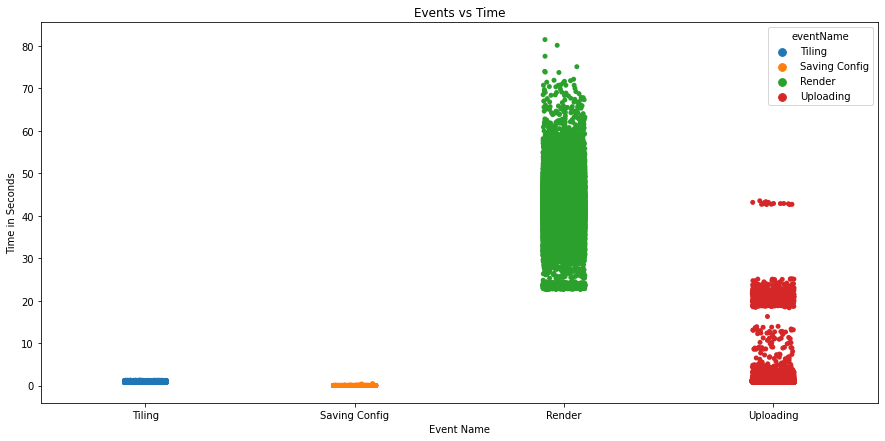

In [17]:
#plot showing Events type vs Time
plt.figure(figsize=(15,7))
plt.title("Events vs Time")
fig=sns.stripplot(x='eventName',y='time difference',hue="eventName",data=sorted_df[-(sorted_df.eventName=='TotalRender')])
fig.set(xlabel="Event Name",ylabel="Time in Seconds")

From above plot we can see that rendering the image takes more time than any other task in overall rendering process. 

**5.2 predicting which event type dominates the task run times for each jobId**

Checking unique values in jobId
To predict which event type dominates the task run times in each jobId, firstly we need to know how many unique jobId (Azure jobs) are present in the dataset. But from the description of data, we already know they are three unique Azure jobs present in the application-checkpoint dataset.


In [18]:
sorted_df['jobId'].unique()

array(['1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705',
       '1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63',
       '1024-lvl4-90b0c947-dcfc-4eea-a1ee-efe843b698df'], dtype=object)

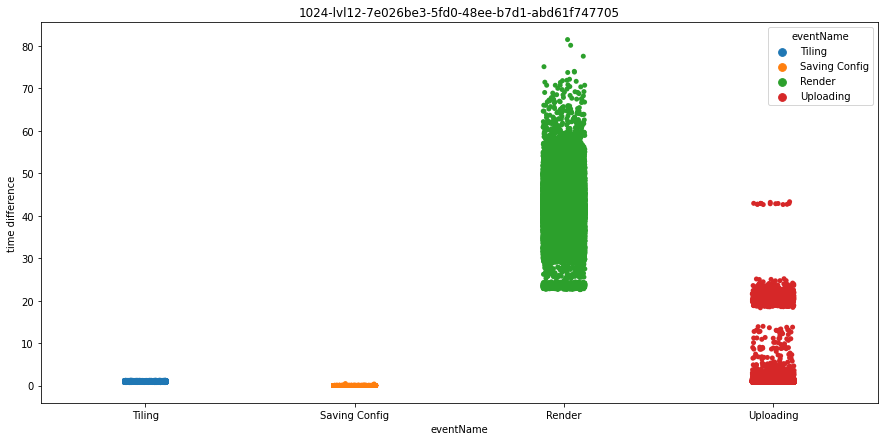

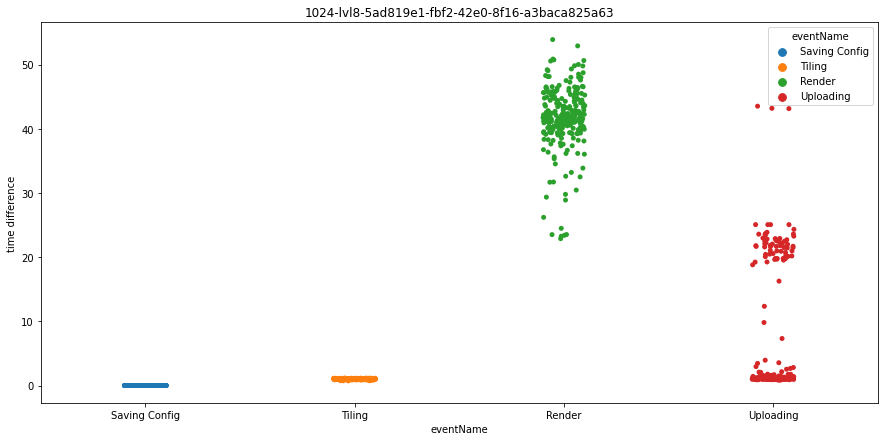

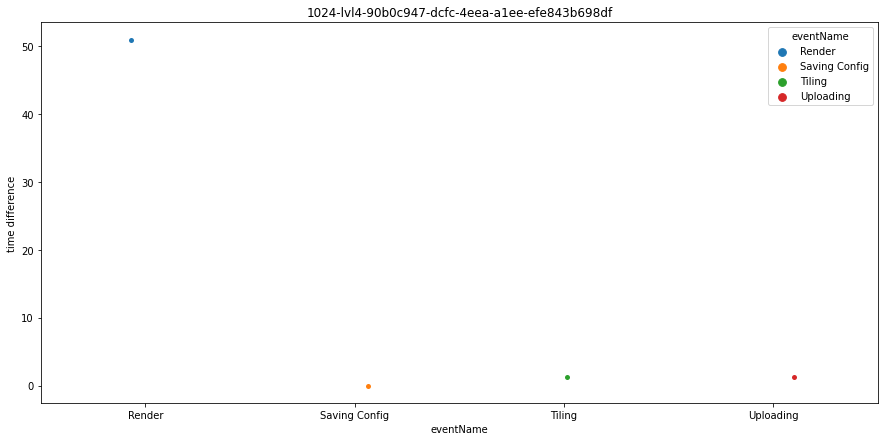

In [19]:
#Plotting the Event vs times for three Azure jobs
list_of_jobs=sorted_df['jobId'].unique()
for i in list_of_jobs:
  jobdf=sorted_df[sorted_df['jobId']==i]
  plt.figure(figsize=(15,7))
  plt.title("Events vs Time")
  fig=sns.stripplot(x='eventName',y='time difference',hue="eventName",data=jobdf[-(jobdf.eventName=='TotalRender')]).set_title(i)

From above plot we can again see that for each job id the render process takes more time than other events.

**5.3 Which level dominates the task run times**


[Text(0, 0.5, 'Time in Seconds'), Text(0.5, 0, 'Level')]

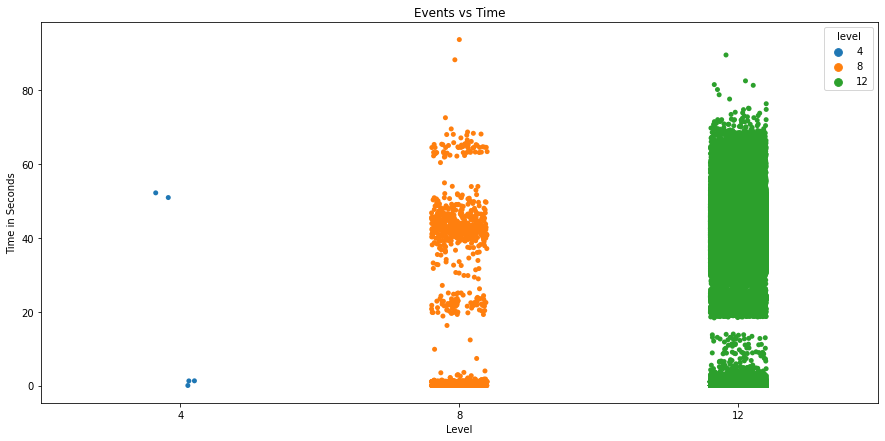

In [20]:
#plot showing level type vs Time
plt.figure(figsize=(15,7))
plt.title("Events vs Time")
fig=sns.stripplot(x='level',y='time difference',hue="level",data=sorted_df)
fig.set(xlabel="Level",ylabel="Time in Seconds")

The above graph shows that level 12 dominates the task run time. Whereas level 4 and 8 has very less impact on the run time. That is, the actions performed on the image by the levels 4, 8 are very less. From the above two graphs it is evident that most of the gpu power is utilized in rendering level 12 that is the inner most zoomed layer of the image.

**5.4 Correlation between attributes of GPU dataset**

In [21]:
gpu.corr()

gpuSerial  powerDrawWatt  gpuTempC  gpuUtilPerc  gpuMemUtilPerc
gpuSerial        1.000000      -0.013008 -0.142388     0.001451        0.004646
powerDrawWatt   -0.013008       1.000000  0.537191     0.862673        0.870745
gpuTempC        -0.142388       0.537191  1.000000     0.505906        0.492783
gpuUtilPerc      0.001451       0.862673  0.505906     1.000000        0.966571
gpuMemUtilPerc   0.004646       0.870745  0.492783     0.966571        1.000000

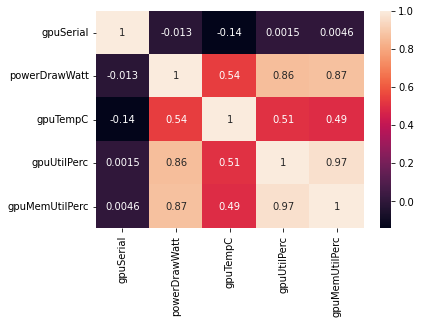

In [22]:
sns.heatmap(gpu.corr(),annot=True)

**Correlation between percent utilization of the GPU (core) and percent utilization of the memory**

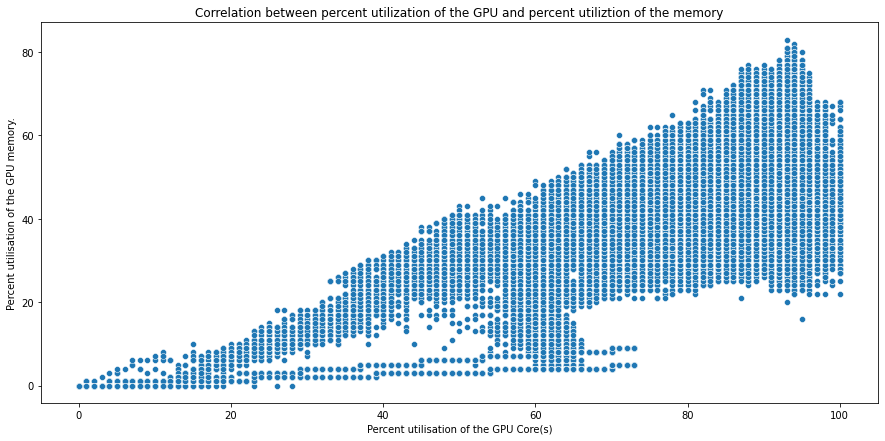

In [23]:
plt.figure(figsize=(15,7))
plt.title("Correlation between percent utilization of the GPU and percent utiliztion of the memory")
plt.xlabel("Percent utilisation of the GPU Core(s)")
plt.ylabel("Percent utilisation of the GPU memory.")
sns.scatterplot(x='gpuUtilPerc',y='gpuMemUtilPerc',data=gpu)

**Correlation between temperature and percent utilization of the GPU (core) and percent utilization of the memory**

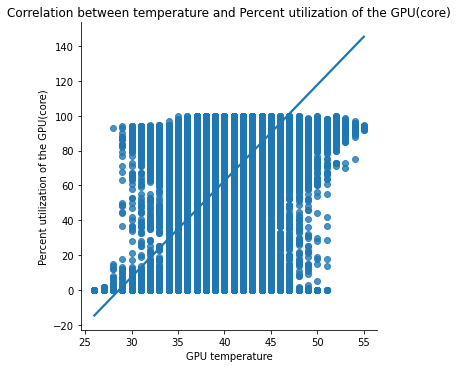

In [ ]:

fig=sns.lmplot(x='gpuTempC',y='gpuUtilPerc',data=gpu).set(title="Correlation between temperature and Percent utilization of the GPU(core)")
fig.set(xlabel="GPU temperature",ylabel="Percent utilization of the GPU(core)",)

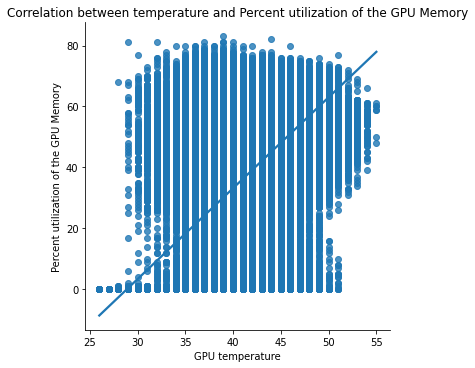

In [ ]:
fig=sns.lmplot(x='gpuTempC',y='gpuMemUtilPerc',data=gpu).set(title="Correlation between temperature and Percent utilization of the GPU Memory")
fig.set(xlabel="GPU temperature",ylabel="Percent utilization of the GPU Memory")

GPU temperature has moderate effect on the percent of utilization of the GPU (core) and percent utilization of the memory.

**Correlation between Power drawn and remaining attributes**

In [51]:
gpu_df=gpu[['powerDrawWatt','gpuTempC','gpuUtilPerc','gpuMemUtilPerc']]

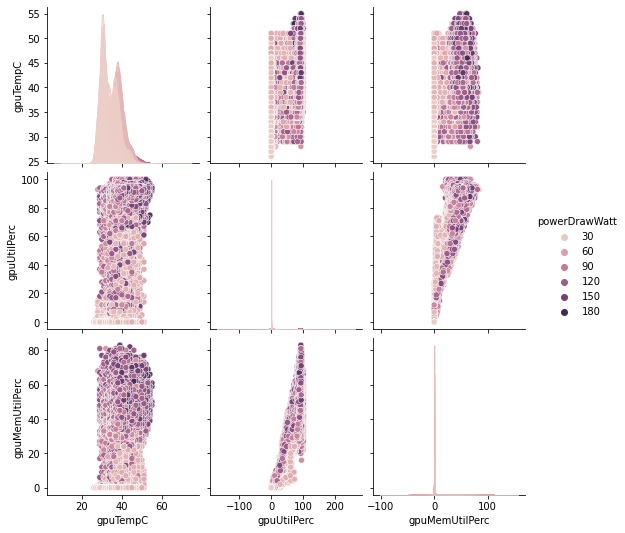

In [52]:
sns.pairplot(gpu_df, hue ='powerDrawWatt')

**5.5 Analyzing GPU Hardware performance by plotting box plot**

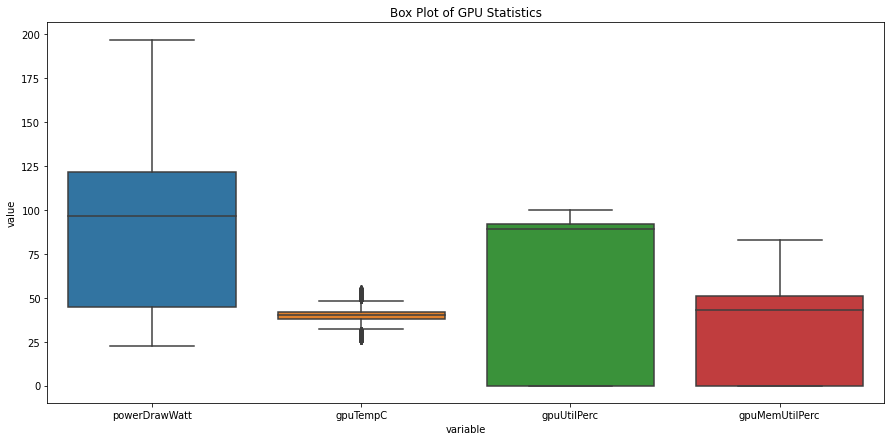

In [26]:
plt.figure(figsize=(15,7))
plt.title("Box Plot of GPU Statistics")
sns.boxplot(x="variable", y="value", data=pd.melt(gpu_df))

Various gpu parameters acquired during image rendering are represented in the above box plot of gpu statistics.

•	GPU Power Drawn: Under normal conditions the power range is between 45 to 121W, with minimum 23W and maximum 200W.

•	GPU Temperature: GPU temperate for maximum cases lies between 30-to-60-degree Celsius.

•	GPU Utility percentage: Since the average is about 85-90 percent, we may assume that most GPUs are almost fully utilized, however, due to the wide interquartile range, certain changes are still required for more efficient handling.

•	Memory Utility percentage: The average here is around 50%, with a smaller and narrower interquartile range, implying that either the rendering work is not memory intensive or the tasks. are not well optimised to utilise the memory.


**5.5.1Power Consumption range**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Power Drawn(in Watts)')

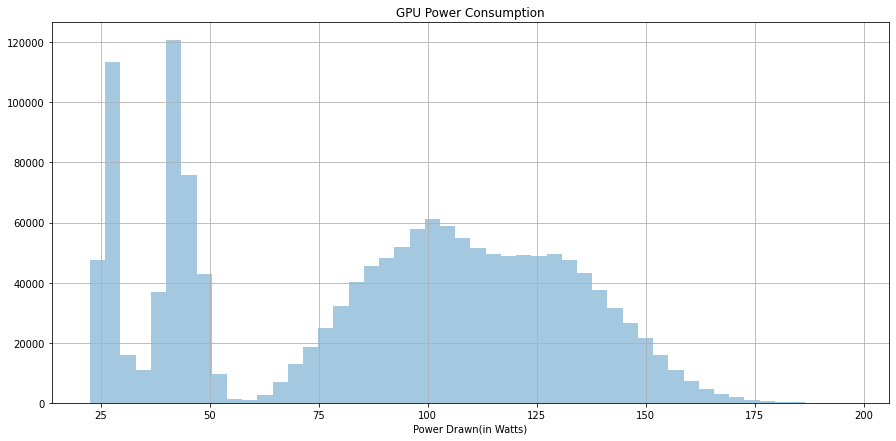

In [27]:
plt.figure(figsize=(15,7))
plt.title("GPU Power Consumption")
plt.grid()
sns.distplot(gpu['powerDrawWatt'], kde = False, label = "Age")
plt.xlabel('Power Drawn(in Watts)')

**5.6 Interplay between increased power draw and render time**

In [28]:
sorted_gpu=gpu.sample(n=50000, weights='powerDrawWatt', random_state=1)

Merging the sorted application_checkpoint dataset(sorted_df) and gpu dataset(sorted_gpu)

In [34]:
merge_df1=pd.merge(sorted_gpu,sorted_df)

Sorting out the total render form merge_df dataset to analyis interplay between increase power draw and render time

In [35]:
grouped=merge_df1.groupby(merge_df1.eventName)
sorted_df1=grouped.get_group('TotalRender')

In [36]:
#time difference between start and stop time
sorted_df1["time difference"]=sorted_df1["stop_time"]-sorted_df1["start_time"]    # adding the seperate time differnce column 
sorted_df1["time difference"]=(sorted_df1["time difference"]/np.timedelta64(1,'s')).abs() #converting time difference into seconds
sorted_df1.head(5)

timestamp  ... time difference
1  2018-11-08 08:08:04.624000+00:00  ...          43.073
3  2018-11-08 08:08:04.624000+00:00  ...          46.034
15 2018-11-08 08:08:04.624000+00:00  ...          43.836
16 2018-11-08 08:08:04.624000+00:00  ...          46.482
27 2018-11-08 08:08:04.624000+00:00  ...          41.377

[5 rows x 17 columns]

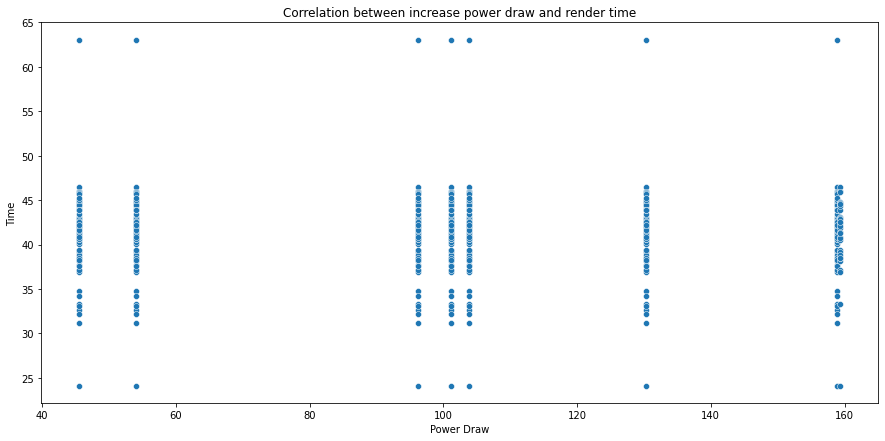

In [37]:
plt.figure(figsize=(15,7))
plt.title("Correlation between increase power draw and render time")
plt.xlabel("Power Draw")
plt.ylabel("Time")
sns.scatterplot(x='powerDrawWatt',y='time difference',data=sorted_df1.head(500))

From above we can clearly see that there is no correlation between the render time and power drawn from gpu. We can see when the power is high the rendering time is less in some cases and in some cases it's opposite.

**5.7 Analysis which level is consuming more power**

In [46]:
lev_4 = sorted_df1.loc[sorted_df1['level'] == 4]
lev_8 = sorted_df1.loc[sorted_df1['level'] == 8]
lev_12 = sorted_df1.loc[sorted_df1['level'] == 12]

In [47]:
lev_4.describe()

gpuSerial  powerDrawWatt   gpuTempC  ...     y  level  time difference
count  5.500000e+01      55.000000  55.000000  ...  55.0   55.0     5.500000e+01
mean   3.236170e+11     111.427818  41.109091  ...   0.0    4.0     5.218200e+01
std    0.000000e+00      34.801238   1.812229  ...   0.0    0.0     5.736733e-14
min    3.236170e+11      26.140000  37.000000  ...   0.0    4.0     5.218200e+01
25%    3.236170e+11      94.355000  40.000000  ...   0.0    4.0     5.218200e+01
50%    3.236170e+11     115.440000  41.000000  ...   0.0    4.0     5.218200e+01
75%    3.236170e+11     137.175000  42.000000  ...   0.0    4.0     5.218200e+01
max    3.236170e+11     158.270000  46.000000  ...   0.0    4.0     5.218200e+01

[8 rows x 9 columns]

In [48]:
lev_8.describe()

gpuSerial  powerDrawWatt  ...    level  time difference
count  1.282300e+04   12823.000000  ...  12823.0      12823.00000
mean   3.239753e+11     106.700976  ...      8.0         48.51291
std    8.491345e+08      33.730768  ...      0.0         10.61189
min    3.201181e+11      23.820000  ...      8.0         24.24900
25%    3.236170e+11      89.665000  ...      8.0         42.10300
50%    3.236170e+11     110.860000  ...      8.0         44.95800
75%    3.250170e+11     132.075000  ...      8.0         51.92900
max    3.252171e+11     192.480000  ...      8.0         93.69700

[8 rows x 9 columns]

In [49]:
lev_12.describe()

gpuSerial  powerDrawWatt  ...      level  time difference
count  3.232929e+06   3.232929e+06  ...  3232929.0     3.232929e+06
mean   3.239817e+11   1.067122e+02  ...       12.0     4.261342e+01
std    1.218203e+09   3.372011e+01  ...        0.0     6.472113e+00
min    3.201181e+11   2.382000e+01  ...       12.0     2.337100e+01
25%    3.236170e+11   9.010000e+01  ...       12.0     3.942400e+01
50%    3.236170e+11   1.114900e+02  ...       12.0     4.286400e+01
75%    3.250170e+11   1.315100e+02  ...       12.0     4.628800e+01
max    3.252171e+11   1.958300e+02  ...       12.0     8.952500e+01

[8 rows x 9 columns]

From above we can see more power,memory is utlizied to render the level 12 which is inner most zoomed layer of the image.

#**6 Conclusion, Results and Future Work**

Summarization of above Exploratory Data Analysis on TersoScope dataset:

The GPU spends the majority of it’s time rendering when compared to other events (tiling, uploading, saving configuration). It is the GPU's most critical task. GPU power consumption and temperature readings were good. While plotting the correlation between different GPU stats we find out that GPU temperature has moderate effect on the percent of utilization of the GPU (core) and percent utilization of the memory, percent utilization of the GPU (core) and percent utilization of the memory are highly correlated with each other. There was no proper correlation between the render time and power drawn by GPU.

**Future Work**

We can use predictive technique to analyze the GPU performance and reliability.







#**7 Learning**

The project taught me how to use a number of tools and improved my understanding of how to evaluate the performance of a system. It has helped me better understand how to use CRISP-DM. Using the Python language and a literate programming framework, I've acquired a variety of analytical strategies for performing data analysis and obtaining relevant information. In the project, I used Jupyter Notebooks and popular libraries like Pandas (for data processing, data cleansing), matplotlib, and seaborn (for data visualization), as well as GitHub for version control, all of which helped me refine my skills in using these tools. I was also able to improve my report writing and data science project management skills as a result of the assignment.

#**Reference**

[1] https://www.microsoft.com/en-us/research/publication/data-intensive-science-terapixel-modisazure-projects/

[2] Holliman, N.S., Antony, M., Charlton, J., Dowsland, S., James, P. and Turner, M., 2019. Petascale cloud supercomputing for terapixel visualization of a digital twin. IEEE Transactions on Cloud Computing.

[3]
https://github.com/NewcastleDataScience/StudentProjects202122/blob/master/TeraScope/Summary.md

[4] https://www.ibm.com/uk-en/cloud/learn/exploratory-data-analysis
